## Подготовка к обучению

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

### Импортируем нужные библиотеки

In [ ]:
import requests
import tarfile
import zipfile
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from glob import glob
import shutil

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### Загрузка и распаковка архива датасета

In [ ]:
dropbox_url = "dataset" # ссылка на датасет
archive_path = "./dataset_archive"
output_dir = "./extracted_dataset"

def download_file(url, save_path):
    response = requests.get(url, stream=True)
    with open(save_path, "wb") as file:
        for data in response.iter_content(chunk_size=4096):
            file.write(data)
    print("Download completed.")

def extract_archive(archive_path, output_dir):
    if zipfile.is_zipfile(archive_path):
        with zipfile.ZipFile(archive_path, 'r') as zip_ref:
            zip_ref.extractall(output_dir)
        print(f"Extracted to {output_dir}.")
    elif tarfile.is_tarfile(archive_path):
        with tarfile.open(archive_path, 'r:*') as tar_ref:
            tar_ref.extractall(output_dir)
        print(f"Extracted to {output_dir}.")
    else:
        print("Unsupported archive format or corrupted file.")

download_file(dropbox_url, archive_path)
extract_archive(archive_path, output_dir)


Download completed.
Extracted to ./extracted_dataset.


### Создание data.yaml файла для дальнейшего обучения нейросети

In [ ]:
dataset_path = "/content/extracted_dataset/dataset_go"
yaml_path = "/content/extracted_dataset/dataset_go/data.yaml"



yaml_content = f"""train: /content/extracted_dataset/dataset_go/images/train
val: /content/extracted_dataset/dataset_go/images/val
test: /content/extracted_dataset/dataset_go/images/test

nc: 21
names: ["Apples", "Bananas", "Beet", "Cabbage", "Carrot", "Chocalate", "Cuccumber", "Eggplant", "Eggs", "Fish", "Flour", "Garlic", "Lemons", "Meat_chicken", "Meat_red", "Mushrooms", "Oranges", "Potato", "Rice", "Sausages", "Tomato" ]

path: /content/extracted_dataset/dataset_go
"""

with open(yaml_path, "w") as f:
    f.write(yaml_content)

print(f"Файл data.yaml создан в {yaml_path}!")

Файл data.yaml создан в /content/extracted_dataset/dataset_go/data.yaml!


### Предварительная проверка для обучения нейросети

In [ ]:
model = YOLO("yolov8s.pt")

model.train(data="/content/extracted_dataset/dataset_go/data.yaml", epochs=1, imgsz=640, cache=True)

print("Проверка окончена!")

Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/extracted_dataset/dataset_go/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

100%|██████████| 755k/755k [00:00<00:00, 21.4MB/s]

Overriding model.yaml nc=80 with nc=21

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

 22        [15, 18, 21]  1   2124175  ultralytics.nn.modules.head.Detect           [21, [128, 256, 512]]         
Model summary: 129 layers, 11,143,727 parameters, 11,143,711 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 95.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2110.3±1224.3 MB/s, size: 211.4 KB)


train: Scanning /content/extracted_dataset/dataset_go/labels/train... 3 images, 0 backgrounds, 0 corrupt:   0%|          | 3/792 [00:00<00:29, 26.41it/s]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
train: Scanning /content/extracted_dataset/dataset_go/labels/train... 771 images, 0 backgrounds, 21 corrupt: 100%|██████████| 792/792 [00:00<00:00, 1020.25it/s]

train: /content/extracted_dataset/dataset_go/images/train/img_00068.jpg: ignoring corrupt image/label: cannot identify image file '/content/extracted_dataset/dataset_go/images/train/img_00068.jpg'
train: /content/extracted_dataset/dataset_go/images/train/img_00212.jpg: ignoring corrupt image/label: cannot identify image file '/content/extracted_dataset/dataset_go/images/train/img_00212.jpg'
train: /content/extracted_dataset/dataset_go/images/train/img_00416.jpg: ignoring corrupt image/label: cannot identify image file '/content/extracted_dataset/dataset_go/images/train/img_00416.jpg'
train: /content/extracted_dataset/dataset_go/images/train/img_00480.jpg: ignoring corrupt image/label: cannot identify image file '/content/extracted_dataset/dataset_go/images/train/img_00480.jpg'
train: /content/extracted_dataset/dataset_go/images/train/img_00540.jpg: ignoring corrupt image/label: cannot identify image file '/content/extracted_dataset/dataset_go/images/train/img_00540.jpg'
train: /content

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.6GB RAM): 100%|██████████| 771/771 [00:17<00:00, 44.50it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 380.5±218.3 MB/s, size: 112.4 KB)


val: Scanning /content/extracted_dataset/dataset_go/labels/val...:   0%|          | 0/99 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
val: Scanning /content/extracted_dataset/dataset_go/labels/val... 95 images, 0 backgrounds, 4 corrupt: 100%|██████████| 99/99 [00:00<00:00, 374.87it/s]

val: /content/extracted_dataset/dataset_go/images/val/img_00029.jpeg: corrupt JPEG restored and saved
val: /content/extracted_dataset/dataset_go/images/val/img_00174.jpg: ignoring corrupt image/label: cannot identify image file '/content/extracted_dataset/dataset_go/images/val/img_00174.jpg'
val: /content/extracted_dataset/dataset_go/images/val/img_00501.jpg: ignoring corrupt image/label: cannot identify image file '/content/extracted_dataset/dataset_go/images/val/img_00501.jpg'
val: /content/extracted_dataset/dataset_go/images/val/img_00555.jpg: ignoring corrupt image/label: cannot identify image file '/content/extracted_dataset/dataset_go/images/val/img_00555.jpg'
val: /content/extracted_dataset/dataset_go/images/val/img_00882.jpg: corrupt JPEG restored and saved
val: /content/extracted_dataset/dataset_go/images/val/img_00967.jpg: ignoring corrupt image/label: cannot identify image file '/content/extracted_dataset/dataset_go/images/val/img_00967.jpg'
val: New cache created: /content/

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 95/95 [00:01<00:00, 55.15it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      3.77G      1.288      3.746      1.567         20        640: 100%|██████████| 49/49 [00:16<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]


                   all         95        205       0.35      0.425      0.329      0.214

1 epochs completed in 0.007 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 22.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,133,711 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]


                   all         95        205      0.351      0.424      0.329      0.214
                Apples          8         10      0.345        0.7       0.61      0.497
               Bananas          7         24      0.412      0.375       0.34      0.177
                  Beet          9         15      0.305       0.76        0.5      0.364
               Cabbage          2          3      0.117      0.667      0.402      0.349
                Carrot          1          1          1          0    0.00234   0.000936
             Chocalate          3          9      0.544      0.444      0.494      0.275
             Cuccumber          6         10      0.257        0.3       0.31      0.188
              Eggplant          5          8      0.598      0.625      0.513      0.206
                  Eggs          2          6      0.291        0.5      0.473      0.253
                  Fish          2          5          0          0     0.0321     0.0155
                 Flou

## Обучение нейросети с использованием ресурсов GPU

In [ ]:
model = YOLO("yolov8s.pt")

model.train(data="/content/extracted_dataset/dataset_go/data.yaml", epochs=50, imgsz=960, cache=True, device="cuda", augment=True)

Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/extracted_dataset/dataset_go/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=960, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

train: Scanning /content/extracted_dataset/dataset_go/labels/train.cache... 771 images, 0 backgrounds, 21 corrupt: 100%|██████████| 792/792 [00:00<?, ?it/s]

train: /content/extracted_dataset/dataset_go/images/train/img_00068.jpg: ignoring corrupt image/label: cannot identify image file '/content/extracted_dataset/dataset_go/images/train/img_00068.jpg'
train: /content/extracted_dataset/dataset_go/images/train/img_00212.jpg: ignoring corrupt image/label: cannot identify image file '/content/extracted_dataset/dataset_go/images/train/img_00212.jpg'
train: /content/extracted_dataset/dataset_go/images/train/img_00416.jpg: ignoring corrupt image/label: cannot identify image file '/content/extracted_dataset/dataset_go/images/train/img_00416.jpg'
train: /content/extracted_dataset/dataset_go/images/train/img_00480.jpg: ignoring corrupt image/label: cannot identify image file '/content/extracted_dataset/dataset_go/images/train/img_00480.jpg'
train: /content/extracted_dataset/dataset_go/images/train/img_00540.jpg: ignoring corrupt image/label: cannot identify image file '/content/extracted_dataset/dataset_go/images/train/img_00540.jpg'
train: /content

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.4GB RAM): 100%|██████████| 771/771 [00:21<00:00, 35.83it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 478.8±110.4 MB/s, size: 112.4 KB)


val: Scanning /content/extracted_dataset/dataset_go/labels/val.cache... 95 images, 0 backgrounds, 4 corrupt: 100%|██████████| 99/99 [00:00<?, ?it/s]

val: /content/extracted_dataset/dataset_go/images/val/img_00029.jpeg: corrupt JPEG restored and saved
val: /content/extracted_dataset/dataset_go/images/val/img_00174.jpg: ignoring corrupt image/label: cannot identify image file '/content/extracted_dataset/dataset_go/images/val/img_00174.jpg'
val: /content/extracted_dataset/dataset_go/images/val/img_00501.jpg: ignoring corrupt image/label: cannot identify image file '/content/extracted_dataset/dataset_go/images/val/img_00501.jpg'
val: /content/extracted_dataset/dataset_go/images/val/img_00555.jpg: ignoring corrupt image/label: cannot identify image file '/content/extracted_dataset/dataset_go/images/val/img_00555.jpg'
val: /content/extracted_dataset/dataset_go/images/val/img_00882.jpg: corrupt JPEG restored and saved
val: /content/extracted_dataset/dataset_go/images/val/img_00967.jpg: ignoring corrupt image/label: cannot identify image file '/content/extracted_dataset/dataset_go/images/val/img_00967.jpg'


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.2GB RAM): 100%|██████████| 95/95 [00:02<00:00, 34.00it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 960 train, 960 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.24G       1.33      4.854      1.764         20        960: 100%|██████████| 49/49 [00:30<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]

                   all         95        205      0.427      0.309      0.258      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.14G      1.276      2.447      1.607         17        960: 100%|██████████| 49/49 [00:28<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         95        205      0.461      0.517      0.472      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.17G      1.197       1.82      1.522         26        960: 100%|██████████| 49/49 [00:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]

                   all         95        205      0.539       0.53      0.532      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.14G      1.201      1.669       1.51         16        960: 100%|██████████| 49/49 [00:29<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         95        205      0.583       0.58      0.608      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.14G      1.192      1.473      1.483         12        960: 100%|██████████| 49/49 [00:29<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

                   all         95        205      0.631      0.595      0.569      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.14G      1.177      1.433      1.485         15        960: 100%|██████████| 49/49 [00:30<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]

                   all         95        205      0.534      0.716      0.643      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.19G      1.165      1.354      1.452         16        960: 100%|██████████| 49/49 [00:29<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         95        205      0.561      0.808      0.733      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.14G      1.099      1.258      1.425         10        960: 100%|██████████| 49/49 [00:29<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]

                   all         95        205      0.565      0.717      0.658      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.14G      1.107      1.193      1.417         10        960: 100%|██████████| 49/49 [00:29<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all         95        205      0.571      0.663      0.667      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.11G      1.108       1.14      1.416         22        960: 100%|██████████| 49/49 [00:29<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         95        205      0.565      0.708      0.667      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       8.2G      1.076      1.123      1.393         15        960: 100%|██████████| 49/49 [00:29<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         95        205      0.682      0.703      0.734      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.14G      1.049      1.075      1.355         17        960: 100%|██████████| 49/49 [00:29<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         95        205      0.599      0.731      0.696      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.14G      1.034      1.027      1.351         22        960: 100%|██████████| 49/49 [00:29<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         95        205      0.661      0.724      0.748      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.13G      1.003     0.9735      1.335         23        960: 100%|██████████| 49/49 [00:28<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all         95        205      0.617      0.767      0.727      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.18G      1.041       1.01      1.362         17        960: 100%|██████████| 49/49 [00:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         95        205       0.64      0.671      0.718      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.13G     0.9744     0.9356      1.313         14        960: 100%|██████████| 49/49 [00:29<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]

                   all         95        205       0.64      0.761      0.737      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.13G     0.9645     0.9178      1.307          9        960: 100%|██████████| 49/49 [00:29<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         95        205      0.724      0.676      0.717      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.12G     0.9372     0.9006       1.29         16        960: 100%|██████████| 49/49 [00:29<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all         95        205      0.713      0.697      0.735      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.16G      0.934     0.8548       1.27         21        960: 100%|██████████| 49/49 [00:29<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]

                   all         95        205       0.68      0.701      0.762      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.16G     0.9395     0.8502      1.285         18        960: 100%|██████████| 49/49 [00:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all         95        205      0.676      0.691      0.709      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.19G      0.904     0.8351      1.265         18        960: 100%|██████████| 49/49 [00:29<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all         95        205      0.701      0.721      0.735      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.14G     0.8768     0.8036      1.247         15        960: 100%|██████████| 49/49 [00:29<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]

                   all         95        205      0.648      0.764      0.753      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.18G     0.8967     0.8131      1.261         12        960: 100%|██████████| 49/49 [00:29<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         95        205      0.649      0.677      0.708      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.14G     0.8674     0.7834      1.241          9        960: 100%|██████████| 49/49 [00:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         95        205       0.63      0.789       0.72      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.12G     0.8576     0.7586      1.233         11        960: 100%|██████████| 49/49 [00:29<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all         95        205      0.546      0.704        0.7      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.09G     0.8396     0.7391      1.224         19        960: 100%|██████████| 49/49 [00:29<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         95        205      0.724      0.698       0.74      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.17G     0.8415     0.7345       1.22         15        960: 100%|██████████| 49/49 [00:29<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all         95        205      0.685      0.811      0.775      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.15G     0.8209     0.6928      1.223         11        960: 100%|██████████| 49/49 [00:29<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         95        205      0.625      0.786      0.752      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.18G     0.8181     0.7045      1.198         13        960: 100%|██████████| 49/49 [00:29<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]

                   all         95        205      0.682      0.804      0.755      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.14G     0.8107     0.6772      1.197         16        960: 100%|██████████| 49/49 [00:29<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all         95        205      0.694      0.818      0.782      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.17G     0.7858     0.6693      1.171          9        960: 100%|██████████| 49/49 [00:29<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all         95        205      0.688      0.768      0.762      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.12G     0.7794     0.6592      1.171         16        960: 100%|██████████| 49/49 [00:29<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         95        205      0.694      0.818      0.777      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.15G     0.7387     0.6164      1.148         13        960: 100%|██████████| 49/49 [00:29<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         95        205      0.677      0.806      0.756      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.11G     0.7543     0.6263      1.146         11        960: 100%|██████████| 49/49 [00:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]

                   all         95        205       0.69      0.755      0.765      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.18G     0.7492     0.6139      1.155          8        960: 100%|██████████| 49/49 [00:29<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         95        205      0.637      0.785       0.75      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.14G     0.7445     0.6133      1.155         12        960: 100%|██████████| 49/49 [00:29<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all         95        205      0.667      0.805      0.733      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.14G      0.715      0.589      1.127         12        960: 100%|██████████| 49/49 [00:29<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         95        205      0.658      0.803      0.759      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.15G     0.7199     0.6176      1.147         19        960: 100%|██████████| 49/49 [00:29<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         95        205      0.705      0.796      0.774      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.13G     0.7006     0.5842      1.119         17        960: 100%|██████████| 49/49 [00:29<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         95        205      0.696      0.766      0.768      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.14G     0.6896     0.5505      1.116         14        960: 100%|██████████| 49/49 [00:29<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all         95        205      0.758      0.765      0.769      0.497


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.09G     0.5991      0.509      1.101          6        960: 100%|██████████| 49/49 [00:29<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         95        205      0.628       0.79      0.733      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.09G     0.5896     0.4466      1.104          5        960: 100%|██████████| 49/49 [00:28<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]

                   all         95        205      0.643      0.811      0.737      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.12G      0.557     0.4142       1.07         10        960: 100%|██████████| 49/49 [00:28<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         95        205      0.722      0.719      0.742      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.08G     0.5457     0.4106      1.058          4        960: 100%|██████████| 49/49 [00:28<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         95        205      0.622      0.771      0.744      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.09G     0.5462     0.4015      1.059          7        960: 100%|██████████| 49/49 [00:27<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.42it/s]

                   all         95        205       0.62      0.802       0.75      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.09G     0.5361     0.3929      1.042          6        960: 100%|██████████| 49/49 [00:28<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         95        205      0.681      0.786      0.758      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.14G     0.5044     0.3783      1.026          6        960: 100%|██████████| 49/49 [00:28<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         95        205      0.701        0.8      0.753      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       8.1G     0.5103     0.3908      1.034          7        960: 100%|██████████| 49/49 [00:28<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         95        205      0.672       0.79      0.755      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.09G     0.4927     0.3621      1.032          8        960: 100%|██████████| 49/49 [00:28<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         95        205      0.678      0.801      0.758        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.07G     0.4874     0.3614      1.024          5        960: 100%|██████████| 49/49 [00:28<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         95        205      0.669      0.785      0.745      0.496



50 epochs completed in 0.440 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 22.6MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,133,711 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.62s/it]


                   all         95        205      0.685       0.84      0.782      0.564
                Apples          8         10      0.424      0.809      0.504      0.455
               Bananas          7         24      0.507      0.625      0.438      0.232
                  Beet          9         15      0.555      0.916      0.663      0.547
               Cabbage          2          3      0.833          1      0.995      0.732
                Carrot          1          1      0.664          1      0.995      0.697
             Chocalate          3          9      0.642      0.778      0.768      0.422
             Cuccumber          6         10      0.816        0.9       0.86      0.639
              Eggplant          5          8      0.715      0.946      0.885      0.597
                  Eggs          2          6      0.811      0.833      0.812      0.773
                  Fish          2          5      0.681        0.8       0.92       0.58
                 Flou

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bc4e4412b50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0

### Проверка работы обученной нейросети


0: 640x960 17 Cuccumbers, 21.9ms
Speed: 5.1ms preprocess, 21.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 960)


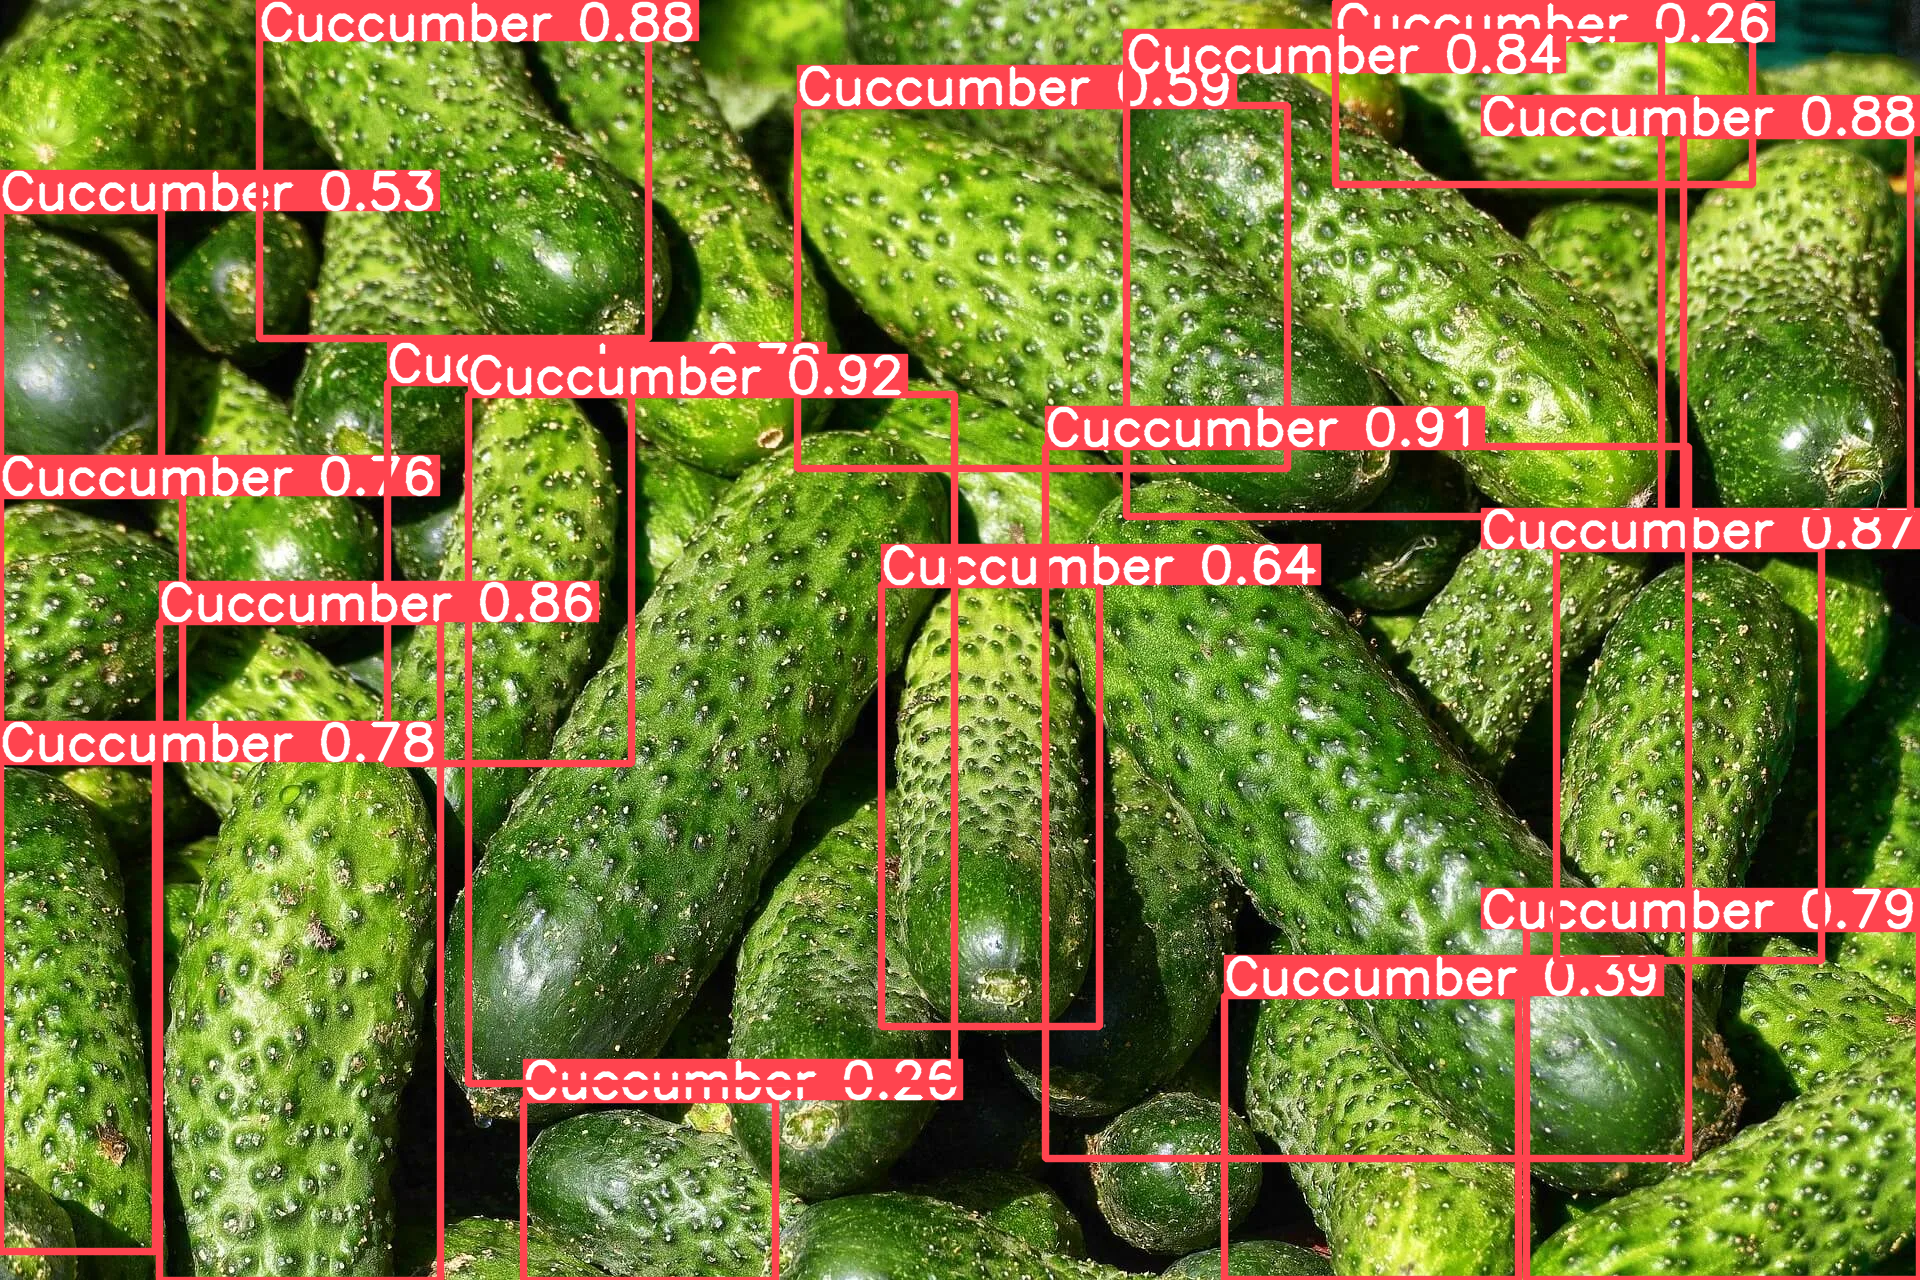

In [ ]:
model = YOLO("/content/runs/detect/train4/weights/best.pt")


image_path = "/content/огурцы.jpg"
image = cv2.imread(image_path)


results = model(image)


for result in results:
    result.show()